# Ford Gobike Data Analysis
## by Mohamed Abuelmaaref

## Investigation Overview

> The overall goals of incistigating this dataset is to find relations and intersections between features that affect the trip numbers and therefore affect the buseness side of the company and to understand the patterns of users to target them and bring them to the group of the most profitable (business wise) group of people.

## Dataset Overview

> The dataset that I am doing analysis on is Ford GoBike dataset about trips recordings of year 2019 february month. Which has records for each trip in details, Time, location, user type, gender, age, and trip duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#dropping rows with nulls
df = df.dropna()
#changing data type for start_time and end_time columns to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
#creating column for start of trip hour
df['start_time_hour']= df['start_time'].dt.hour
#creating column for start of trip day
df['start_time_dayofw']= df['start_time'].dt.strftime('%a')
#creating column for start of trip day of year number
df['start_time_dayofy']= df['start_time'].dt.dayofyear
#creating column for end of trip day of year number
df['end_time_dayofy'] = df['end_time'].dt.dayofyear
#creating column for user age
df['age'] = 2019 - df['member_birth_year'].astype(int)
#changing data type of user_type and member_gender to category
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
#calculating the days of rent
df['days_of_rent'] = df['end_time_dayofy'] - df['start_time_dayofy']
#creating a column for duration of trips in minuts
df['duration_min'] = df['duration_sec']/60
#to drop all the columns of age more than 64.
df = df[df["age"] < 65]
#dropping all data for trips over one hour
df = df[df["duration_min"] <= 60]

## Distribution of Trips Throughout The Days of The Week

> I have found out that throughout the days of week the number of trips in weekends is less than the rest of the days, While on the other hand the average duration of the trips in the weekends is higher than the rest of the days.

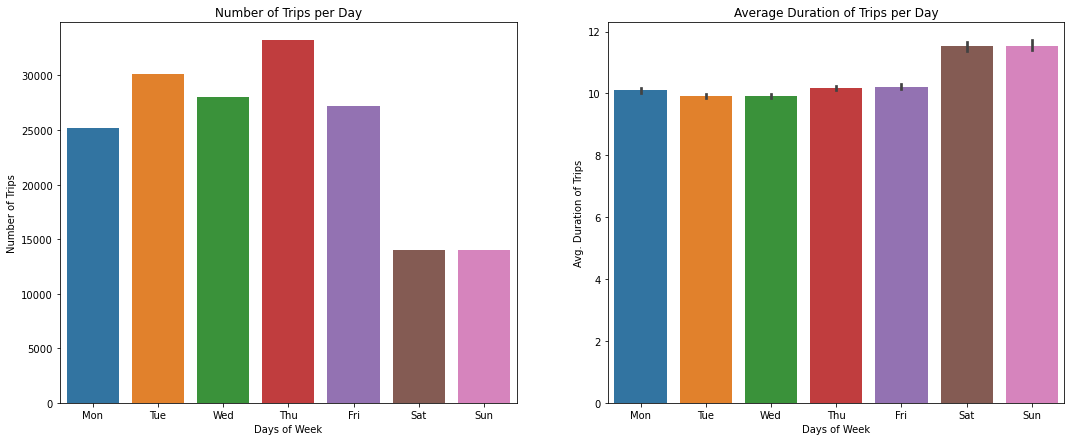

In [4]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18, 7)
plt.subplot(1, 2, 1);
sb.countplot(data=df, x="start_time_dayofw", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]).set_title('Number of Trips per Day')
plt.xlabel('Days of Week');
plt.ylabel('Number of Trips');
plt.subplot(1, 2, 2);
sb.barplot(data=df , x = 'start_time_dayofw', y = 'duration_min', order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]).set_title('Average Duration of Trips per Day')
plt.xlabel('Days of Week');
plt.ylabel('Avg. Duration of Trips');
fig.show()

## Gender Based Analysis of Trips Throughout The Week

> Males have a much higher trips over the week than the other genders, while on the other hand they have the less average trip duration. Females and Other gender tend to spend more time in trips.

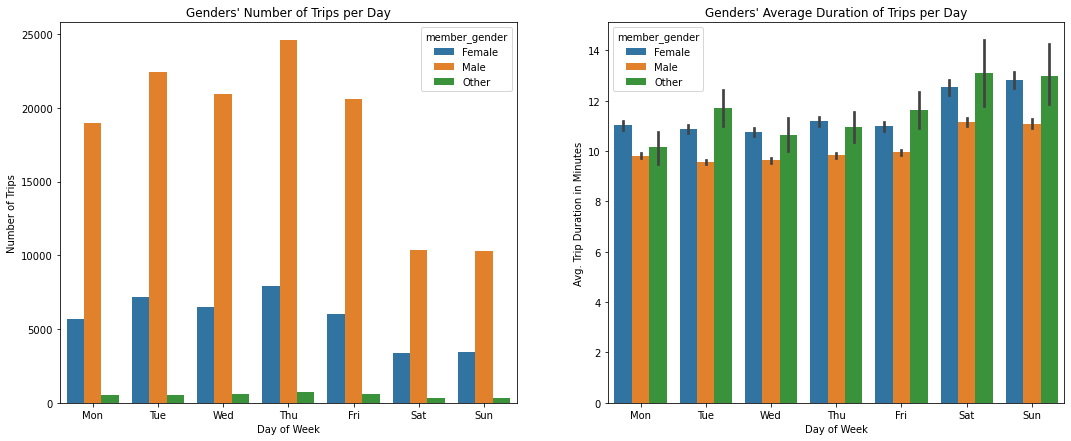

In [5]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18, 7)
plt.subplot(1, 2, 1);
sb.countplot(data=df, x="start_time_dayofw", hue ="member_gender", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]).set_title("Genders' Number of Trips per Day")
plt.xlabel('Day of Week');
plt.ylabel('Number of Trips');
plt.subplot(1, 2, 2);
sb.barplot(data=df, x="start_time_dayofw", y = 'duration_min', hue ="member_gender", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]).set_title("Genders' Average Duration of Trips per Day")
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minutes');

## User Type Analysis

> Subscribers tend to spend less time in trips. Also subscribers are less than customers which is good business wise.

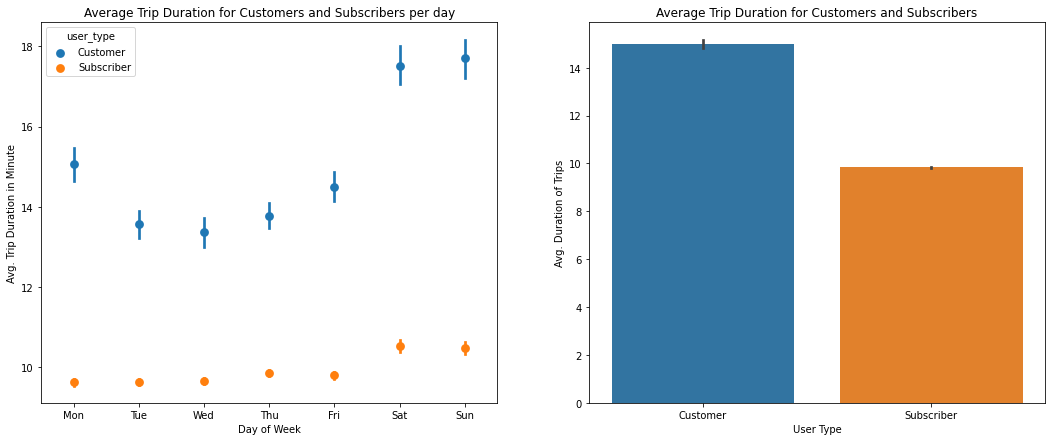

In [6]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18, 7)
plt.subplot(1, 2, 1);
sb.pointplot(data=df, x='start_time_dayofw', y='duration_min', hue='user_type', linestyles="", order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]).set_title('Average Trip Duration for Customers and Subscribers per day')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.subplot(1, 2, 2);
sb.barplot(data=df , x = 'user_type', y = 'duration_min').set_title('Average Trip Duration for Customers and Subscribers')
plt.xlabel('User Type');
plt.ylabel('Avg. Duration of Trips');

In [7]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
